# Спрос на рейсы авиакомпании

# Содержание

- Шаг 1. Откроем файлы с данными и изучим общую информацию
- Шаг 2. Подготовим данные
- Шаг 3. Ответим на вопросы исследования
- Шаг 4. Общий вывод

# Шаг 1. Откроем файлы с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
df_list = [query_1,query_3]
for df in df_list:
    print('Первые 5 строк')
    print('-'*50)
    display(df.head())
    print('-'*50)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('-'*50)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*50)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*50)
    print('Наличие пропусков')
    print('-'*50)
    print(df.isna().sum())
    print('Стат данные')
    print('-'*50)
    display(df.describe())

Первые 5 строк
--------------------------------------------------


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (8, 2)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
model             0
flights_amount    0
dtype: int64
Стат данные
--------------------------------------------------


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Первые 5 строк
--------------------------------------------------


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (101, 2)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
city               0
average_flights    0
dtype: int64
Стат данные
--------------------------------------------------


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


 У нас  две таблицы. query_1 на 8 строк. И query_3 - 101 строка. В таблице query_3 нужно изменить тип данных в столбце average_flights.

# Шаг 2. Подготовим данные

Изменим тип данных для average_flights на int:

In [4]:
query_3['average_flights'] = query_3['average_flights'].astype('int')

# Шаг 3. Ответим на вопросы исследования

In [5]:
top10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)

In [6]:
display(top10_cities)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


**построим график: модели самолетов и количество рейсов**

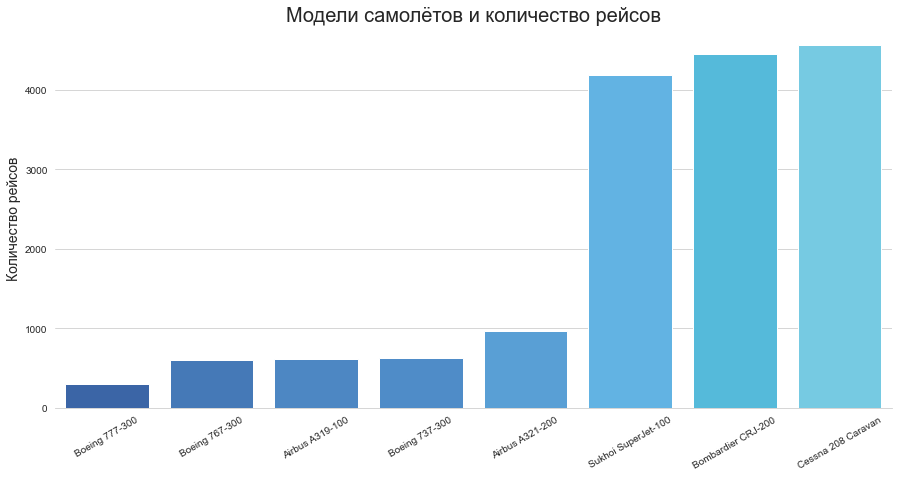

In [7]:
a = query_1.sort_values(by='flights_amount')

palette = ['#2961b8ff', '#3277caff', '#3987D7', '#3b8cdcff', '#44a2eaff', '#4db8f8ff', '#3fc5f0ff', '#64d4f4ff', '#7ddbf6ff', '#96e2f8ff']

sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('Модели самолётов и количество рейсов', fontsize=20)
sns.barplot(x='model', y='flights_amount', data=a, label="line", palette=palette)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('Количество рейсов', fontsize=14)
plt.xticks(rotation=30)
plt.show()

3 модели ( Cessna 208 Caravan(9-13 пассажиров),Bombardier CRJ-200(40-50 пассажиров),Sukhoi SuperJet-100(87-108 пассажиров)) совершили в 4-10 раз больше,чем другие модели. Это небольшие самолёты выполняющие региональные маршруты. 

**построим график: города и количество рейсов**

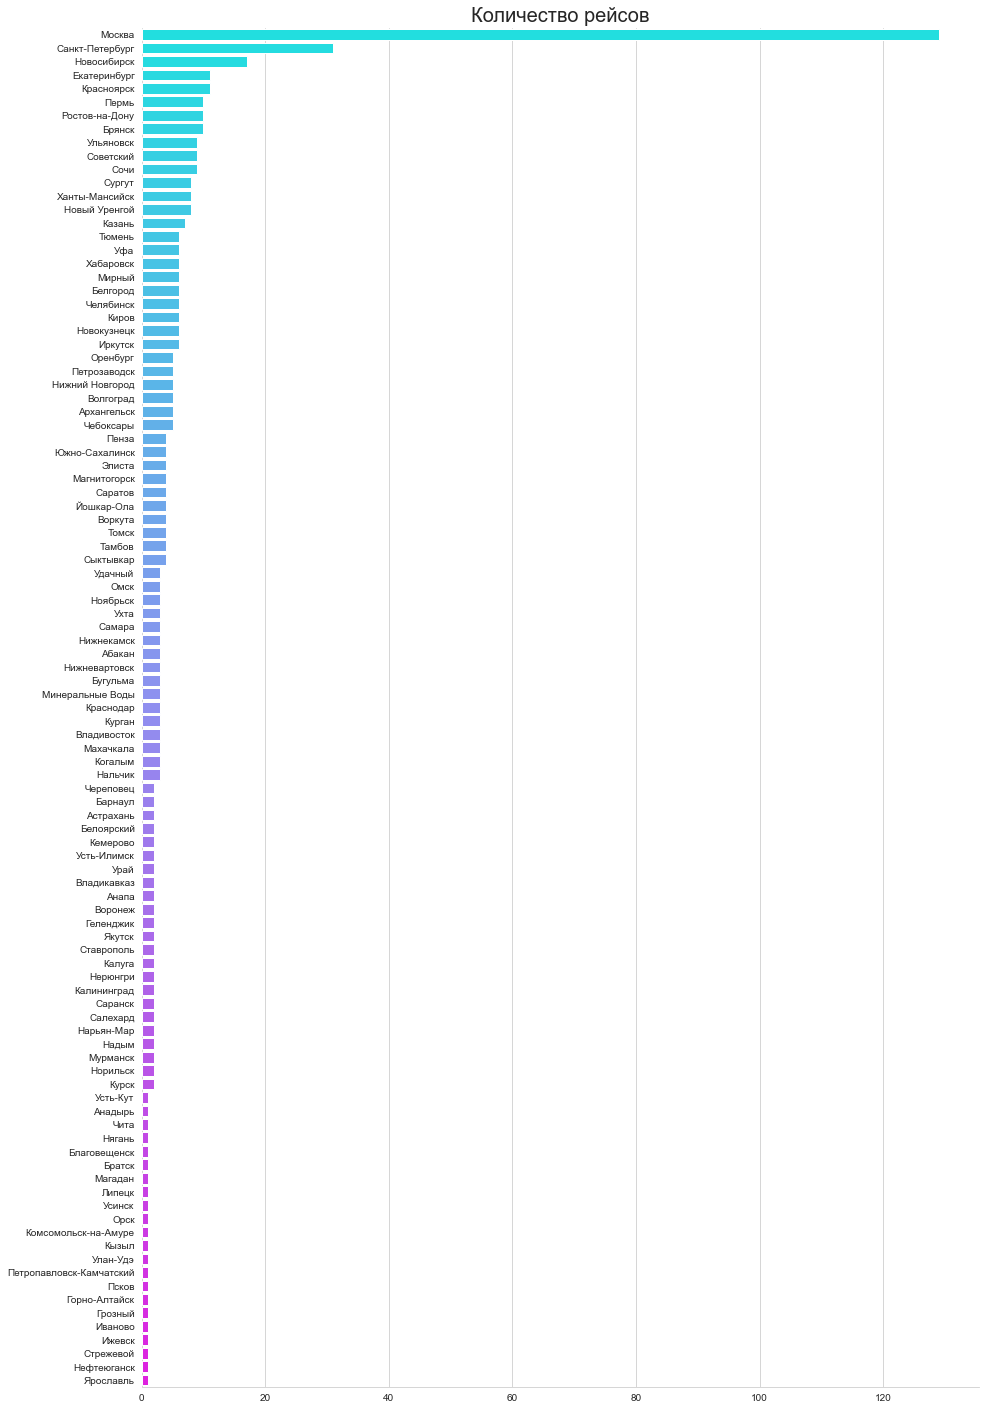

In [8]:
b = query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(15, 25))
plt.title('Количество рейсов', fontsize=20)
sns.barplot(x='average_flights', y='city', data=b, palette='cool')
sns.despine(left=True)
plt.ylabel('')
plt.xlabel('', fontsize=14)
plt.show()

Список городов достаточно большой, все они представляют РФ. Но подавляющее количество рейсов прибывают в Москву.

**построим график:топ-10 городов и количество рейсов**

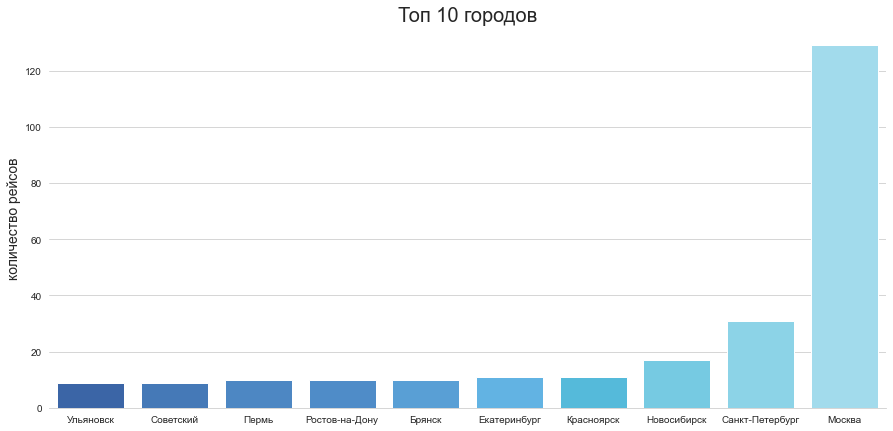

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('Топ 10 городов', fontsize=20)
sns.barplot(x='city', y='average_flights', data=top10_cities.sort_values(by='average_flights', ascending=True), palette=palette)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('количество рейсов', fontsize=14)
plt.show()

-  Тройка лидеров: Москва, Питер, Новосибирск.
    
    
-  Очень интересно, что в топ-10 у данной авиакомпании,в данных за август, не попали курортные Сочи, Краснодар, Мин.воды ит.д.

# Шаг 4. Общий вывод

Данная авиакомпания в основном использует небольшие самолёты: Cessna 208 Caravan,Bombardier CRJ-20,Sukhoi SuperJet-100.
   
   
   
Основным центром базирования данной авиакомпании является город: Москва.
